#Q3_C

In [ ]:
!pip install gdown
!gdown 1zl41GfNfFRZ_mepZRTc4tsGximpqs8hX

Downloading...
From (original): https://drive.google.com/uc?id=1zl41GfNfFRZ_mepZRTc4tsGximpqs8hX
From (redirected): https://drive.google.com/uc?id=1zl41GfNfFRZ_mepZRTc4tsGximpqs8hX&confirm=t&uuid=9119c490-24d4-4b59-9904-1dcc071899c5
To: /content/creditcard.csv
100% 151M/151M [00:04<00:00, 34.7MB/s]


##Q3_C_1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Load the dataset
data = pd.read_csv('/content/creditcard.csv')
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.dropna(inplace=True)
data.isnull().sum()
data.shape

(284807, 31)

In [ ]:
# Drop the "Time" column
data.drop(columns=['Time'], inplace=True)
# Normalize the "Amount" column
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])
# Apply PCA to the features (excluding "Amount" and "Class")
features = data.drop(columns=['Class','Amount'])
pca = PCA()
pca_features = pca.fit_transform(features)
# Convert PCA features to a DataFrame
pca_features_df = pd.DataFrame(pca_features, columns=[f'V_{i+1}' for i in range(pca_features.shape[1])])
# Combine the PCA features with the "Class" column
data_pca = pd.concat([pca_features_df, data[['Amount','Class']]], axis=1)
print(data_pca)
array = data_pca.values  #  numpy array
np.random.seed(64)
np.random.shuffle(array)  # Shuffle the array
data = pd.DataFrame(array, columns=data_pca.columns)
print(data)
# Split the data into training and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=64)
train_data, valid_data = train_test_split(train_data, test_size=0.1, random_state=64)
# Separate features and labels
X_train = train_data.drop(columns=['Class'])
y_train = train_data['Class']
X_test = test_data.drop(columns=['Class'])
y_test = test_data['Class']
X_valid = test_data.drop(columns=['Class'])
y_valid = test_data['Class']

              V_1        V_2       V_3       V_4       V_5       V_6  \
0        1.359807   0.072781 -2.536347  1.378155  0.338321  0.462388   
1       -1.191857  -0.266151 -0.166480  0.448154 -0.060018 -0.082361   
2        1.358354   1.340163 -1.773209  0.379780  0.503198  1.800499   
3        0.966272   0.185226 -1.792993 -0.863291  0.010309  1.247203   
4        1.158233  -0.877737 -1.548718  0.403034  0.407193  0.095921   
...           ...        ...       ...       ...       ...       ...   
284802  11.881118 -10.071785  9.834783 -2.066656  5.364473 -2.606837   
284803   0.732789   0.055080 -2.035030 -0.738589 -0.868229  1.058415   
284804  -1.919565   0.301254  3.249640 -0.557828 -2.630515  3.031260   
284805   0.240440  -0.530483 -0.702510  0.689799  0.377961  0.623708   
284806   0.533413   0.189733 -0.703337 -0.506271  0.012546 -0.649617   

             V_7       V_8       V_9      V_10  ...      V_21      V_22  \
0       0.239599 -0.098698  0.363787 -0.090794  ...  0.01830

##Q3_C_2

In [ ]:
print(X_train.shape)
unique, counts = np.unique(y_train, return_counts=True)
print("Class counts:", dict(zip(unique, counts)))

(205060, 29)
Class counts: {0.0: 204686, 1.0: 374}


In [ ]:
from imblearn.over_sampling import SMOTE
# Perform oversampling on the training dataset using SMOTE
smote = SMOTE(random_state=64)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
unique, counts = np.unique(y_train_resampled, return_counts=True)
print("Class counts:", dict(zip(unique, counts)))

Class counts: {0.0: 204686, 1.0: 204686}


##Q3_C_3

In [ ]:
# Add Gaussian noise to the training dataset
np.random.seed(64)
noise_factor = 0.5
X_train_noisy = X_train_resampled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_resampled.shape)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define the 7-layer autoencoder architecture
input_dim = X_train.shape[1] #input_dim=29
input_layer = Input(shape=(input_dim,))
encoder_1 = Dense(22, activation='relu')(input_layer)
encoder_2 = Dense(15, activation='relu')(encoder_1)
latent_layer = Dense(10, activation='relu')(encoder_2)
decoder_1 = Dense(15, activation='relu')(latent_layer)
decoder_2 = Dense(22, activation='relu')(decoder_1)
output_layer = Dense(input_dim, activation='sigmoid')(decoder_2)

autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
np.random.seed(64)
tf.random.set_seed(64)
# Define the checkpoint callback
checkpoint = ModelCheckpoint('denoising_autoencoder_best_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
# Train the model
history = autoencoder.fit(X_train_noisy, X_train_resampled,
                          epochs=200,
                          batch_size=100,
                          shuffle=True,
                          validation_data=(X_valid, X_valid),
                          callbacks=[checkpoint, early_stopping])


Epoch 1/200
4089/4094 [============================>.] - ETA: 0s - loss: 11.8525
Epoch 1: val_loss improved from inf to 0.93784, saving model to denoising_autoencoder_best_model.h5
4094/4094 [==============================] - 11s 2ms/step - loss: 11.8536 - val_loss: 0.9378
Epoch 2/200
  37/4094 [..............................] - ETA: 11s - loss: 11.9573

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4086/4094 [============================>.] - ETA: 0s - loss: 11.7992
Epoch 2: val_loss improved from 0.93784 to 0.91899, saving model to denoising_autoencoder_best_model.h5
4094/4094 [==============================] - 9s 2ms/step - loss: 11.7966 - val_loss: 0.9190
Epoch 3/200
4079/4094 [============================>.] - ETA: 0s - loss: 11.7805
Epoch 3: val_loss improved from 0.91899 to 0.90243, saving model to denoising_autoencoder_best_model.h5
4094/4094 [==============================] - 11s 3ms/step - loss: 11.7791 - val_loss: 0.9024
Epoch 4/200
4092/4094 [============================>.] - ETA: 0s - loss: 11.7724
Epoch 4: val_loss improved from 0.90243 to 0.89536, saving model to denoising_autoencoder_best_model.h5
4094/4094 [==============================] - 10s 2ms/step - loss: 11.7720 - val_loss: 0.8954
Epoch 5/200
4092/4094 [============================>.] - ETA: 0s - loss: 11.7655
Epoch 5: val_loss improved from 0.89536 to 0.88957, saving model to denoising_autoencoder_best_mod

In [ ]:
# Load the best model
autoencoder.load_weights('denoising_autoencoder_best_model.h5')
# Denoise the test data
X_test_denoised = autoencoder.predict(X_test)
# Evaluate the model on test data
test_loss = autoencoder.evaluate(X_test, X_test)
print(f'Test loss: {test_loss}')

1781/1781 [==============================] - 2s 1ms/step - loss: 0.8658
Test loss: 0.8658053278923035


##Q3_C_4

In [ ]:
# Get the denoised training data
autoencoder.load_weights('denoising_autoencoder_best_model.h5')
X_train_denoised = autoencoder.predict(X_train_noisy)
X_test_denoised = autoencoder.predict(X_test)
X_valid_denoised = autoencoder.predict(X_valid)

1781/1781 [==============================] - 2s 1ms/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
# Build the classifier
classifier = Sequential([
    Dense(22, input_dim=29, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(2, activation='softmax')
])
# Compile the classifier
classifier.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
np.random.seed(64)
tf.random.set_seed(64)
# Define the checkpoint callback
checkpoint1 = ModelCheckpoint('classifier_best_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
# Early stopping to avoid overfitting
early_stopping1 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
# Train the classifier
history_classifier = classifier.fit(X_train_denoised, y_train_resampled,
                                    epochs=200,
                                    batch_size=100,
                                    shuffle=True,
                                    validation_data=(X_valid_denoised, y_valid),
                                    callbacks=[checkpoint1, early_stopping1])


Epoch 1/200
4094/4094 [==============================] - ETA: 0s - loss: 0.1147 - accuracy: 0.9548
Epoch 1: val_loss improved from inf to 0.08312, saving model to classifier_best_model.h5
4094/4094 [==============================] - 9s 2ms/step - loss: 0.1147 - accuracy: 0.9548 - val_loss: 0.0831 - val_accuracy: 0.9761
Epoch 2/200
4086/4094 [============================>.] - ETA: 0s - loss: 0.1083 - accuracy: 0.9576
Epoch 2: val_loss improved from 0.08312 to 0.07942, saving model to classifier_best_model.h5
4094/4094 [==============================] - 10s 3ms/step - loss: 0.1083 - accuracy: 0.9575 - val_loss: 0.0794 - val_accuracy: 0.9758
Epoch 3/200
4086/4094 [============================>.] - ETA: 0s - loss: 0.1045 - accuracy: 0.9594
Epoch 3: val_loss improved from 0.07942 to 0.07705, saving model to classifier_best_model.h5
4094/4094 [==============================] - 10s 2ms/step - loss: 0.1045 - accuracy: 0.9594 - val_loss: 0.0771 - val_accuracy: 0.9772
Epoch 4/200
4074/4094 [====

In [ ]:
# Load the best model
classifier.load_weights('classifier_best_model.h5')
# Denoise the test data
test_loss, test_accuracy = classifier.evaluate(X_test_denoised, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

1781/1781 [==============================] - 2s 1ms/step - loss: 0.0464 - accuracy: 0.9882
Test Loss: 0.04644890874624252
Test Accuracy: 0.9882377982139587


In [ ]:
# Load the best weights for the autoencoder
autoencoder.load_weights('denoising_autoencoder_best_model.h5')
# Inspect the weights of the autoencoder
autoencoder_weights = autoencoder.get_weights()
# Print the weights of each layer in the autoencoder
for i, weight in enumerate(autoencoder_weights):
    print(f"Layer {i} weights: {weight}")
# Load the best weights for the classifier
classifier.load_weights('classifier_best_model.h5')
# Inspect the weights of the classifier
classifier_weights = classifier.get_weights()
# Print the weights of each layer in the classifier
for i, weight in enumerate(classifier_weights):
    print(f"Layer {i} weights: {weight}")

Layer 0 weights: [[ 6.67013302e-02 -2.78380532e-02  8.85004938e-01  2.63762623e-01
   6.15424037e-01  5.74065670e-02  9.01102871e-02  6.24261558e-01
   6.91289485e-01 -1.64818883e-01 -8.01173970e-03  9.58620310e-02
   1.16169296e-01 -1.25399828e-01  2.70429850e-01 -2.11492017e-01
   7.01274909e-03 -8.54259789e-01  6.46097004e-01 -1.47603825e-01
   3.58955652e-01  1.02717943e-01]
 [-1.87583447e-01  6.29084855e-02 -4.01036767e-03  9.69512343e-01
  -6.54874861e-01  5.34180999e-02  1.29215598e-01 -1.96043357e-01
   9.77676034e-01 -6.84883911e-03  1.53567433e-01  1.37110114e-01
  -1.83122367e-01  4.27219607e-02 -4.06028718e-01  4.32456791e-01
  -1.09439291e-01  3.88243556e-01 -6.97185099e-01  5.52970730e-02
   9.34788227e-01  9.02563483e-02]
 [ 4.33198482e-01  2.66667217e-01  2.51103580e-01  4.66355421e-02
  -3.87026109e-02 -2.69954026e-01  2.13618964e-01 -1.52982533e-01
  -5.03045358e-02 -1.82918161e-01 -2.67555624e-01 -3.46222132e-01
  -2.37111188e-02  3.82142901e-01 -1.49309654e-02 -6.33

#Q3_D

1781/1781 [==============================] - 2s 1ms/step

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     56874
         1.0       0.11      0.91      0.19        88

    accuracy                           0.99     56962
   macro avg       0.55      0.95      0.59     56962
weighted avg       1.00      0.99      0.99     56962

Recall: 0.9090909090909091
Precision: 0.1078167115902965
Accuracy: 0.9882377725501211
F1-Score: 0.1927710843373494

Classification Report:
               precision    recall  f1-score   support

      Normal       1.00      0.99      0.99     56874
       Fraud       0.11      0.91      0.19        88

    accuracy                           0.99     56962
   macro avg       0.55      0.95      0.59     56962
weighted avg       1.00      0.99      0.99     56962



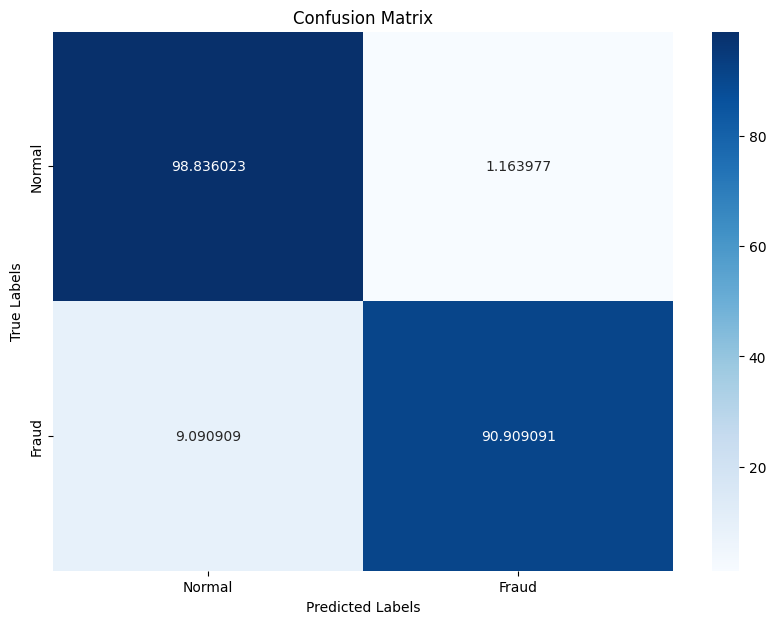

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load the best weights
classifier.load_weights('classifier_best_model.h5')
# Predict the labels for the test data
y_pred_prob = classifier.predict(X_test_denoised)
# Get the class with the highest probability
y_pred = np.argmax(y_pred_prob, axis=1)
# Calculate confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] * 100
recall = recall_score(y_test, y_pred, average='binary')
precision = precision_score(y_test, y_pred, average='binary')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='binary')
# Print metrics
print(f'Recall: {recall}')
print(f'Precision: {precision}')
print(f'Accuracy: {accuracy}')
print(f'F1-Score: {f1}')
# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Normal', 'Fraud']))
# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='2f', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#Q3_E

##without sampling_strategy change




1781/1781 [==============================] - 2s 1ms/step


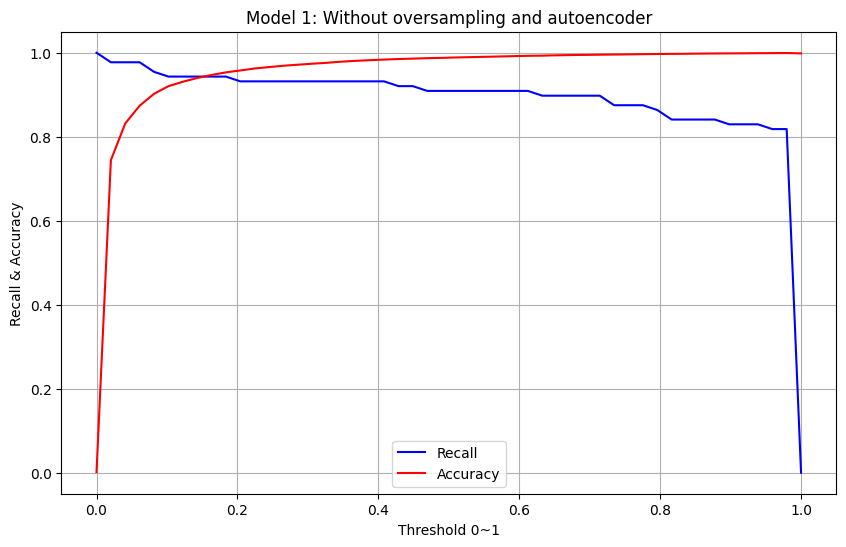

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
# Set random seeds for reproducibility
np.random.seed(64)
tf.random.set_seed(64)
# Define your oversampling ratios
thresholds = np.linspace(0, 1, 50)
recalls = []
accuracies = []
# Load the best model weights
autoencoder.load_weights('denoising_autoencoder_best_model.h5')
classifier.load_weights('classifier_best_model.h5')
# Denoise the test data using the trained autoencoder
X_test_denoised = autoencoder.predict(X_test)
# Evaluate the model at different thresholds
y_pred_prob = classifier.predict(X_test_denoised)
for threshold in thresholds:
    y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recalls.append(recall)
    accuracies.append(accuracy)
# Plot Recall and Accuracy on the same plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label='Recall', color='b')
plt.plot(thresholds, accuracies, label='Accuracy', color='r')
plt.xlabel('Threshold 0~1')
plt.ylabel('Recall & Accuracy')
plt.title('Model 1: Without oversampling and autoencoder')
plt.legend()
plt.grid(True)
plt.show()

##sampling_strategy change


Epoch 1/10
1500/1502 [============================>.] - ETA: 0s - loss: 2.7705
Epoch 1: val_loss improved from inf to 0.85002, saving model to denoising_autoencoder_model.h5
1502/1502 [==============================] - 4s 3ms/step - loss: 2.7704 - val_loss: 0.8500
Epoch 2/10
  66/1502 [>.............................] - ETA: 3s - loss: 2.7692

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1492/1502 [============================>.] - ETA: 0s - loss: 2.7696
Epoch 2: val_loss improved from 0.85002 to 0.84817, saving model to denoising_autoencoder_model.h5
1502/1502 [==============================] - 6s 4ms/step - loss: 2.7694 - val_loss: 0.8482
Epoch 3/10
1485/1502 [============================>.] - ETA: 0s - loss: 2.7648
Epoch 3: val_loss improved from 0.84817 to 0.84676, saving model to denoising_autoencoder_model.h5
1502/1502 [==============================] - 4s 3ms/step - loss: 2.7689 - val_loss: 0.8468
Epoch 4/10
1497/1502 [============================>.] - ETA: 0s - loss: 2.7688
Epoch 4: val_loss did not improve from 0.84676
1502/1502 [==============================] - 4s 3ms/step - loss: 2.7685 - val_loss: 0.8474
Epoch 5/10
1492/1502 [============================>.] - ETA: 0s - loss: 2.7664
Epoch 5: val_loss improved from 0.84676 to 0.84649, saving model to denoising_autoencoder_model.h5
1502/1502 [==============================] - 5s 3ms/step - loss: 2.7683 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1499/1502 [============================>.] - ETA: 0s - loss: 0.0412 - accuracy: 0.9872
Epoch 2: val_loss improved from 0.01478 to 0.00912, saving model to classifier_model.h5
1502/1502 [==============================] - 5s 4ms/step - loss: 0.0412 - accuracy: 0.9872 - val_loss: 0.0091 - val_accuracy: 0.9987
Epoch 3/10
1491/1502 [============================>.] - ETA: 0s - loss: 0.0401 - accuracy: 0.9875
Epoch 3: val_loss did not improve from 0.00912
1502/1502 [==============================] - 4s 3ms/step - loss: 0.0402 - accuracy: 0.9874 - val_loss: 0.0134 - val_accuracy: 0.9980
Epoch 4/10
1490/1502 [============================>.] - ETA: 0s - loss: 0.0396 - accuracy: 0.9877
Epoch 4: val_loss did not improve from 0.00912
1502/1502 [==============================] - 4s 2ms/step - loss: 0.0396 - accuracy: 0.9877 - val_loss: 0.0152 - val_accuracy: 0.9972
Epoch 5/10
1502/1502 [==============================] - ETA: 0s - loss: 0.0390 - accuracy: 0.9879
Epoch 5: val_loss did not improve from

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1619/1638 [============================>.] - ETA: 0s - loss: 4.4359
Epoch 2: val_loss improved from 0.84577 to 0.84425, saving model to denoising_autoencoder_model.h5
1638/1638 [==============================] - 4s 3ms/step - loss: 4.4345 - val_loss: 0.8443
Epoch 3/10
1635/1638 [============================>.] - ETA: 0s - loss: 4.4352
Epoch 3: val_loss improved from 0.84425 to 0.84422, saving model to denoising_autoencoder_model.h5
1638/1638 [==============================] - 6s 4ms/step - loss: 4.4343 - val_loss: 0.8442
Epoch 4/10
1630/1638 [============================>.] - ETA: 0s - loss: 4.4356
Epoch 4: val_loss improved from 0.84422 to 0.84406, saving model to denoising_autoencoder_model.h5
1638/1638 [==============================] - 4s 3ms/step - loss: 4.4340 - val_loss: 0.8441
Epoch 5/10
1621/1638 [============================>.] - ETA: 0s - loss: 4.4328
Epoch 5: val_loss did not improve from 0.84406
1638/1638 [==============================] - 4s 3ms/step - loss: 4.4341 - val_

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1626/1638 [============================>.] - ETA: 0s - loss: 0.0580 - accuracy: 0.9807
Epoch 2: val_loss did not improve from 0.01704
1638/1638 [==============================] - 5s 3ms/step - loss: 0.0581 - accuracy: 0.9806 - val_loss: 0.0227 - val_accuracy: 0.9958
Epoch 3/10
1617/1638 [============================>.] - ETA: 0s - loss: 0.0575 - accuracy: 0.9809
Epoch 3: val_loss did not improve from 0.01704
1638/1638 [==============================] - 4s 2ms/step - loss: 0.0574 - accuracy: 0.9809 - val_loss: 0.0220 - val_accuracy: 0.9953
Epoch 4/10
1628/1638 [============================>.] - ETA: 0s - loss: 0.0570 - accuracy: 0.9810
Epoch 4: val_loss did not improve from 0.01704
1638/1638 [==============================] - 4s 2ms/step - loss: 0.0569 - accuracy: 0.9810 - val_loss: 0.0230 - val_accuracy: 0.9958
Epoch 5/10
1619/1638 [============================>.] - ETA: 0s - loss: 0.0566 - accuracy: 0.9812
Epoch 5: val_loss did not improve from 0.01704
1638/1638 [=====================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1898/1911 [============================>.] - ETA: 0s - loss: 7.0247
Epoch 2: val_loss improved from 0.84562 to 0.84408, saving model to denoising_autoencoder_model.h5
1911/1911 [==============================] - 5s 3ms/step - loss: 7.0224 - val_loss: 0.8441
Epoch 3/10
1903/1911 [============================>.] - ETA: 0s - loss: 7.0250
Epoch 3: val_loss did not improve from 0.84408
1911/1911 [==============================] - 5s 3ms/step - loss: 7.0220 - val_loss: 0.8453
Epoch 4/10
1905/1911 [============================>.] - ETA: 0s - loss: 7.0186
Epoch 4: val_loss did not improve from 0.84408
1911/1911 [==============================] - 7s 3ms/step - loss: 7.0218 - val_loss: 0.8445
Epoch 5/10
1892/1911 [============================>.] - ETA: 0s - loss: 7.0183
Epoch 5: val_loss did not improve from 0.84408
1911/1911 [==============================] - 5s 2ms/step - loss: 7.0214 - val_loss: 0.8449
Epoch 6/10
1905/1911 [============================>.] - ETA: 0s - loss: 7.0243
Epoch 6: val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1911/1911 [==============================] - ETA: 0s - loss: 0.0795 - accuracy: 0.9707
Epoch 2: val_loss did not improve from 0.03924
1911/1911 [==============================] - 5s 2ms/step - loss: 0.0795 - accuracy: 0.9707 - val_loss: 0.0497 - val_accuracy: 0.9856
Epoch 3/10
1908/1911 [============================>.] - ETA: 0s - loss: 0.0785 - accuracy: 0.9710
Epoch 3: val_loss improved from 0.03924 to 0.03567, saving model to classifier_model.h5
1911/1911 [==============================] - 6s 3ms/step - loss: 0.0784 - accuracy: 0.9711 - val_loss: 0.0357 - val_accuracy: 0.9903
Epoch 4/10
1890/1911 [============================>.] - ETA: 0s - loss: 0.0777 - accuracy: 0.9714
Epoch 4: val_loss did not improve from 0.03567
1911/1911 [==============================] - 4s 2ms/step - loss: 0.0777 - accuracy: 0.9714 - val_loss: 0.0360 - val_accuracy: 0.9901
Epoch 5/10
1911/1911 [==============================] - ETA: 0s - loss: 0.0770 - accuracy: 0.9717
Epoch 5: val_loss improved from 0.0356

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2178/2184 [============================>.] - ETA: 0s - loss: 8.9780
Epoch 2: val_loss did not improve from 0.84346
2184/2184 [==============================] - 6s 3ms/step - loss: 8.9785 - val_loss: 0.8470
Epoch 3/10
2165/2184 [============================>.] - ETA: 0s - loss: 8.9785
Epoch 3: val_loss did not improve from 0.84346
2184/2184 [==============================] - 7s 3ms/step - loss: 8.9784 - val_loss: 0.8435
Epoch 4/10
2172/2184 [============================>.] - ETA: 0s - loss: 8.9709
Epoch 4: val_loss did not improve from 0.84346
2184/2184 [==============================] - 5s 2ms/step - loss: 8.9782 - val_loss: 0.8474
Epoch 5/10
2180/2184 [============================>.] - ETA: 0s - loss: 8.9765
Epoch 5: val_loss did not improve from 0.84346
2184/2184 [==============================] - 7s 3ms/step - loss: 8.9783 - val_loss: 0.8441
Epoch 6/10
2166/2184 [============================>.] - ETA: 0s - loss: 8.9747
Epoch 6: val_loss did not improve from 0.84346
2184/2184 [======

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2183/2184 [============================>.] - ETA: 0s - loss: 0.0841 - accuracy: 0.9676
Epoch 2: val_loss improved from 0.04668 to 0.04586, saving model to classifier_model.h5
2184/2184 [==============================] - 6s 3ms/step - loss: 0.0841 - accuracy: 0.9676 - val_loss: 0.0459 - val_accuracy: 0.9857
Epoch 3/10
2168/2184 [============================>.] - ETA: 0s - loss: 0.0832 - accuracy: 0.9678
Epoch 3: val_loss improved from 0.04586 to 0.04524, saving model to classifier_model.h5
2184/2184 [==============================] - 6s 3ms/step - loss: 0.0833 - accuracy: 0.9678 - val_loss: 0.0452 - val_accuracy: 0.9869
Epoch 4/10
2176/2184 [============================>.] - ETA: 0s - loss: 0.0825 - accuracy: 0.9681
Epoch 4: val_loss did not improve from 0.04524
2184/2184 [==============================] - 5s 2ms/step - loss: 0.0826 - accuracy: 0.9681 - val_loss: 0.0520 - val_accuracy: 0.9834
Epoch 5/10
2176/2184 [============================>.] - ETA: 0s - loss: 0.0821 - accuracy: 0.96

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2450/2457 [============================>.] - ETA: 0s - loss: 10.5202
Epoch 2: val_loss improved from 0.84549 to 0.84544, saving model to denoising_autoencoder_model.h5
2457/2457 [==============================] - 6s 3ms/step - loss: 10.5190 - val_loss: 0.8454
Epoch 3/10
2456/2457 [============================>.] - ETA: 0s - loss: 10.5193
Epoch 3: val_loss improved from 0.84544 to 0.84428, saving model to denoising_autoencoder_model.h5
2457/2457 [==============================] - 8s 3ms/step - loss: 10.5190 - val_loss: 0.8443
Epoch 4/10
2447/2457 [============================>.] - ETA: 0s - loss: 10.5201
Epoch 4: val_loss did not improve from 0.84428
2457/2457 [==============================] - 6s 2ms/step - loss: 10.5189 - val_loss: 0.8474
Epoch 5/10
2448/2457 [============================>.] - ETA: 0s - loss: 10.5213
Epoch 5: val_loss did not improve from 0.84428
2457/2457 [==============================] - 7s 3ms/step - loss: 10.5188 - val_loss: 0.8452
Epoch 6/10
2445/2457 [=========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2446/2457 [============================>.] - ETA: 0s - loss: 0.0861 - accuracy: 0.9661
Epoch 2: val_loss did not improve from 0.05966
2457/2457 [==============================] - 6s 2ms/step - loss: 0.0862 - accuracy: 0.9660 - val_loss: 0.0660 - val_accuracy: 0.9764
Epoch 3/10
2452/2457 [============================>.] - ETA: 0s - loss: 0.0854 - accuracy: 0.9662
Epoch 3: val_loss improved from 0.05966 to 0.05590, saving model to classifier_model.h5
2457/2457 [==============================] - 7s 3ms/step - loss: 0.0855 - accuracy: 0.9662 - val_loss: 0.0559 - val_accuracy: 0.9805
Epoch 4/10
2445/2457 [============================>.] - ETA: 0s - loss: 0.0848 - accuracy: 0.9665
Epoch 4: val_loss did not improve from 0.05590
2457/2457 [==============================] - 6s 2ms/step - loss: 0.0847 - accuracy: 0.9665 - val_loss: 0.0584 - val_accuracy: 0.9809
Epoch 5/10
2440/2457 [============================>.] - ETA: 0s - loss: 0.0844 - accuracy: 0.9663
Epoch 5: val_loss improved from 0.0559

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2730/2730 [==============================] - ETA: 0s - loss: 11.7253
Epoch 2: val_loss did not improve from 0.84457
2730/2730 [==============================] - 9s 3ms/step - loss: 11.7253 - val_loss: 0.8454
Epoch 3/10
2729/2730 [============================>.] - ETA: 0s - loss: 11.7249
Epoch 3: val_loss improved from 0.84457 to 0.84452, saving model to denoising_autoencoder_model.h5
2730/2730 [==============================] - 7s 2ms/step - loss: 11.7251 - val_loss: 0.8445
Epoch 4/10
2717/2730 [============================>.] - ETA: 0s - loss: 11.7235
Epoch 4: val_loss did not improve from 0.84452
2730/2730 [==============================] - 8s 3ms/step - loss: 11.7249 - val_loss: 0.8466
Epoch 5/10
2716/2730 [============================>.] - ETA: 0s - loss: 11.7279
Epoch 5: val_loss did not improve from 0.84452
2730/2730 [==============================] - 7s 2ms/step - loss: 11.7249 - val_loss: 0.8469
Epoch 6/10
2728/2730 [============================>.] - ETA: 0s - loss: 11.7249
Epo

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


2720/2730 [============================>.] - ETA: 0s - loss: 0.0861 - accuracy: 0.9658
Epoch 2: val_loss did not improve from 0.06091
2730/2730 [==============================] - 7s 3ms/step - loss: 0.0861 - accuracy: 0.9658 - val_loss: 0.0638 - val_accuracy: 0.9767
Epoch 3/10
2725/2730 [============================>.] - ETA: 0s - loss: 0.0856 - accuracy: 0.9659
Epoch 3: val_loss did not improve from 0.06091
2730/2730 [==============================] - 7s 3ms/step - loss: 0.0856 - accuracy: 0.9658 - val_loss: 0.0619 - val_accuracy: 0.9799
Epoch 4/10
2727/2730 [============================>.] - ETA: 0s - loss: 0.0853 - accuracy: 0.9661
Epoch 4: val_loss did not improve from 0.06091
2730/2730 [==============================] - 7s 3ms/step - loss: 0.0853 - accuracy: 0.9661 - val_loss: 0.0767 - val_accuracy: 0.9746
Epoch 5/10
2715/2730 [============================>.] - ETA: 0s - loss: 0.0849 - accuracy: 0.9663
Epoch 5: val_loss did not improve from 0.06091
2730/2730 [=====================

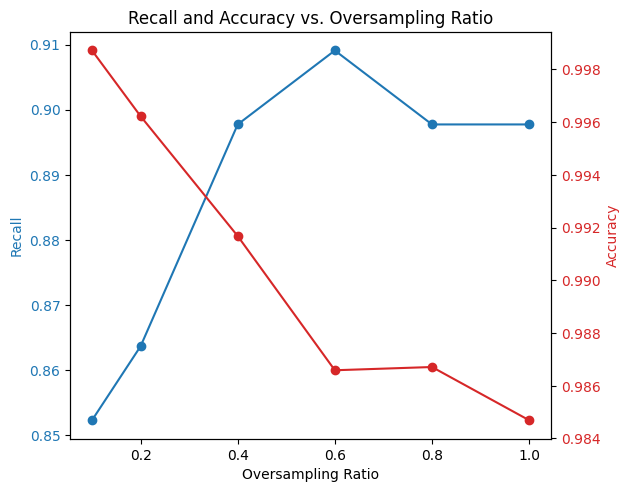

Best Model Evaluation on Test Data:
[[56011   863]
 [    9    79]]

Classification Report:
               precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     56874
       Fraud       0.08      0.90      0.15        88

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# Set random seeds for reproducibility
np.random.seed(64)
tf.random.set_seed(64)
# Define your oversampling ratios
oversampling_ratios = [0.1, 0.2, 0.4,0.6,0.8,1]
recalls = []
accuracies = []
# Preprocess data
for ratio in oversampling_ratios:
    # Apply SMOTE
    smote = SMOTE(sampling_strategy=ratio, random_state=64)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Add Gaussian noise to the training dataset
    noise_factor = 0.5
    X_train_noisy = X_train_resampled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_resampled.shape)

    # Denoise the training data using the trained autoencoder
    from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
    np.random.seed(64)
    tf.random.set_seed(64)
    # Define the checkpoint callback
    checkpoint2 = ModelCheckpoint('denoising_autoencoder_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
    # Early stopping to avoid overfitting
    early_stopping2 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
    # Train the model
    autoencoder.fit(X_train_noisy, X_train_resampled,
                              epochs=10,
                              batch_size=150,
                              shuffle=True,
                              validation_data=(X_valid, X_valid),
                              callbacks=[checkpoint2, early_stopping2])
    X_train_denoised = autoencoder.predict(X_train_noisy)
    X_valid_denoised = autoencoder.predict(X_valid)

    # Define callbacks
    checkpoint3 = ModelCheckpoint('classifier_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
    early_stopping3 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

    # Train the classifier
    classifier.fit(X_train_denoised, y_train_resampled,
                                        epochs=10,
                                        batch_size=150,
                                        shuffle=True,
                                        validation_data=(X_valid_denoised, y_valid),
                                        callbacks=[checkpoint3, early_stopping3])
    # Load the best model weights
    autoencoder.load_weights('denoising_autoencoder_model.h5')
    classifier.load_weights('classifier_model.h5')
    # Denoise the test data using the trained autoencoder
    X_test_denoised = autoencoder.predict(X_test)
    # Predict the labels for the test data
    y_pred_prob = classifier.predict(X_test_denoised)
    y_pred = np.argmax(y_pred_prob, axis=1)
    # Calculate metrics
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recalls.append(recall)
    accuracies.append(accuracy)
# Plot Recall and Accuracy on the same plot
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Oversampling Ratio')
ax1.set_ylabel('Recall', color=color)
ax1.plot(oversampling_ratios, recalls, marker='o', color=color, label='Recall')
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Accuracy', color=color)  # we already handled the x-label with ax1
ax2.plot(oversampling_ratios, accuracies, marker='o', color=color, label='Accuracy')
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Recall and Accuracy vs. Oversampling Ratio')
plt.show()
# Evaluate the best model on test data
print("Best Model Evaluation on Test Data:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))

#Q3_F

Epoch 1/200
4076/4094 [============================>.] - ETA: 0s - loss: 0.1476 - accuracy: 0.9455
Epoch 1: val_loss improved from inf to 0.04560, saving model to classifier.h5
4094/4094 [==============================] - 13s 3ms/step - loss: 0.1475 - accuracy: 0.9455 - val_loss: 0.0456 - val_accuracy: 0.9924
Epoch 2/200
  81/4094 [..............................] - ETA: 7s - loss: 0.1278 - accuracy: 0.9488

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4092/4094 [============================>.] - ETA: 0s - loss: 0.1258 - accuracy: 0.9508
Epoch 2: val_loss did not improve from 0.04560
4094/4094 [==============================] - 11s 3ms/step - loss: 0.1258 - accuracy: 0.9508 - val_loss: 0.0531 - val_accuracy: 0.9924
Epoch 3/200
4090/4094 [============================>.] - ETA: 0s - loss: 0.1218 - accuracy: 0.9524
Epoch 3: val_loss did not improve from 0.04560
4094/4094 [==============================] - 10s 2ms/step - loss: 0.1219 - accuracy: 0.9524 - val_loss: 0.0769 - val_accuracy: 0.9877
Epoch 4/200
4079/4094 [============================>.] - ETA: 0s - loss: 0.1194 - accuracy: 0.9530
Epoch 4: val_loss did not improve from 0.04560
4094/4094 [==============================] - 10s 2ms/step - loss: 0.1194 - accuracy: 0.9530 - val_loss: 0.0828 - val_accuracy: 0.9862
Epoch 5/200
4091/4094 [============================>.] - ETA: 0s - loss: 0.1178 - accuracy: 0.9536
Epoch 5: val_loss did not improve from 0.04560
4094/4094 [===============

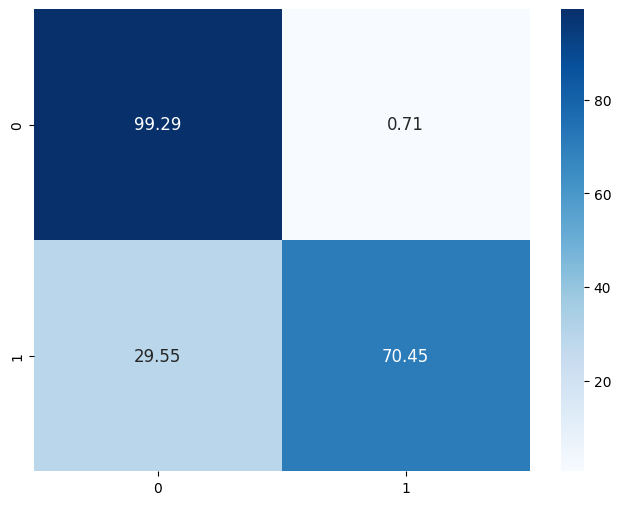

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=64)
train_data, valid_data = train_test_split(train_data, test_size=0.1, random_state=64)
# Separate features and labels
X_train = train_data.drop(columns=['Class'])
y_train = train_data['Class']
X_test = test_data.drop(columns=['Class'])
y_test = test_data['Class']
X_valid = test_data.drop(columns=['Class'])
y_valid = test_data['Class']
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
classifier = Sequential([
    Dense(22, input_dim=29, activation='relu'),
    Dense(15, activation='relu'),
    Dense(10, activation='relu'),
    Dense(5, activation='relu'),
    Dense(2, activation='softmax')
])
# Compile the classifier
classifier.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
np.random.seed(64)
tf.random.set_seed(64)
# Define the checkpoint callback
checkpoint1 = ModelCheckpoint('classifier.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)
# Early stopping to avoid overfitting
early_stopping1 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
# Train the classifier
history_classifier = classifier.fit(X_train_denoised, y_train_resampled,
                                    epochs=200,
                                    batch_size=100,
                                    shuffle=True,
                                    validation_data=(X_valid, y_valid),
                                    callbacks=[checkpoint1, early_stopping1])
classifier.load_weights('classifier.h5')
y_pred = classifier.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix_percent = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis] * 100
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix_percent, annot=True, fmt='.2f', cmap='Blues', annot_kws={"size": 12})
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

1781/1781 [==============================] - 2s 1ms/step


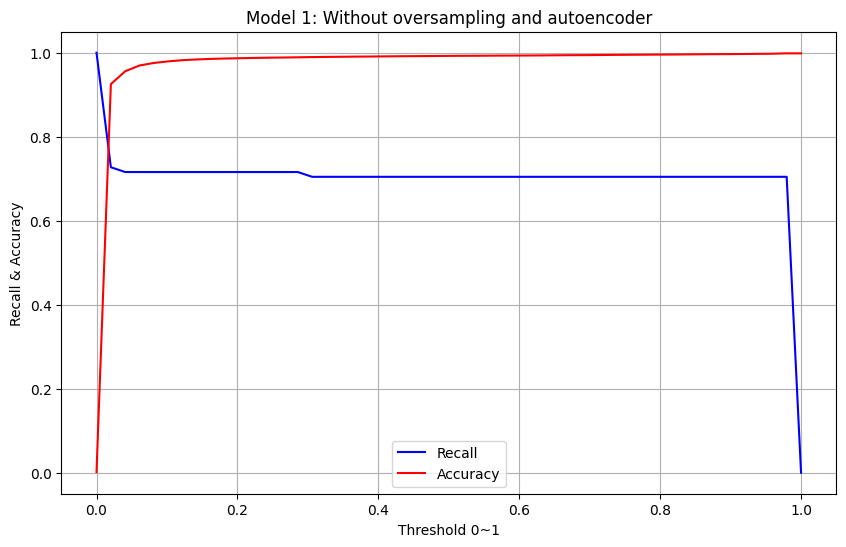

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
# Set random seeds for reproducibility
np.random.seed(64)
tf.random.set_seed(64)
# Define your oversampling ratios
thresholds = np.linspace(0, 1, 50)
recalls = []
accuracies = []
# Load the best model weights
classifier.load_weights('classifier.h5')
# Evaluate the model at different thresholds
y_pred_prob = classifier.predict(X_test)
for threshold in thresholds:
    y_pred = (y_pred_prob[:, 1] >= threshold).astype(int)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    recalls.append(recall)
    accuracies.append(accuracy)
# Plot Recall and Accuracy on the same plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, recalls, label='Recall', color='b')
plt.plot(thresholds, accuracies, label='Accuracy', color='r')
plt.xlabel('Threshold 0~1')
plt.ylabel('Recall & Accuracy')
plt.title('Model 1: Without oversampling and autoencoder')
plt.legend()
plt.grid(True)
plt.show()